# Analysis of the *Corporate Credit Rating* dataset
In this notebook we will cover the basics of the chosen data's analysis, while visualizing the results of the examinations gone trough. Nevertheless, the deeper analysis development will be found in the corresponding documentation, just the essential will be included in this file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("../../data/ccr.csv")
df.head(3)

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231


In [25]:
print(df.Rating.value_counts())
for i in df.Rating.value_counts().index:
    print(f"{i}: {df.Rating.value_counts()[i]}; {round(df.Rating.value_counts()[i]/len(df)*100, 2)}%")

Rating
BBB     910
BBB+    846
A       836
A-      722
BBB-    705
BB+     545
A+      478
BB      453
BB-     427
B+      422
B       310
B-      288
AA-     254
AA      185
CCC+    151
AAA      90
AA+      73
CCC      65
CC       18
C        11
CCC-     10
D         5
CC+       1
Name: count, dtype: int64
BBB: 910; 11.66%
BBB+: 846; 10.84%
A: 836; 10.71%
A-: 722; 9.25%
BBB-: 705; 9.03%
BB+: 545; 6.98%
A+: 478; 6.12%
BB: 453; 5.8%
BB-: 427; 5.47%
B+: 422; 5.41%
B: 310; 3.97%
B-: 288; 3.69%
AA-: 254; 3.25%
AA: 185; 2.37%
CCC+: 151; 1.93%
AAA: 90; 1.15%
AA+: 73; 0.94%
CCC: 65; 0.83%
CC: 18; 0.23%
C: 11; 0.14%
CCC-: 10; 0.13%
D: 5; 0.06%
CC+: 1; 0.01%


### 1. Structural Overview

In [3]:
print(f"Total number of training instances: {df.shape[0]}.")
print(f"Number of features to work with: {df.shape[1]}.")

Total number of training instances: 7805.
Number of features to work with: 25.


In [4]:
print(f"\nFeature type of each variable: {df.dtypes}.")


Feature type of each variable: Rating Agency                        str
Corporation                          str
Rating                               str
Rating Date                          str
CIK                                int64
Binary Rating                      int64
SIC Code                         float64
Sector                               str
Ticker                               str
Current Ratio                    float64
Long-term Debt / Capital         float64
Debt/Equity Ratio                float64
Gross Margin                     float64
Operating Margin                 float64
EBIT Margin                      float64
EBITDA Margin                    float64
Pre-Tax Profit Margin            float64
Net Profit Margin                float64
Asset Turnover                   float64
ROE - Return On Equity           float64
Return On Tangible Equity        float64
ROA - Return On Assets           float64
ROI - Return On Investment       float64
Operating Cash Flow Per S

In total being:

In [5]:
print(df.dtypes.value_counts())

float64    17
str         6
int64       2
Name: count, dtype: int64


Missingness check:

In [6]:
print(f"Number of missing data for our dataset: {df.isnull().sum()}")

Number of missing data for our dataset: Rating Agency                    0
Corporation                      0
Rating                           0
Rating Date                      0
CIK                              0
Binary Rating                    0
SIC Code                         0
Sector                           0
Ticker                           0
Current Ratio                    0
Long-term Debt / Capital         0
Debt/Equity Ratio                0
Gross Margin                     0
Operating Margin                 0
EBIT Margin                      0
EBITDA Margin                    0
Pre-Tax Profit Margin            0
Net Profit Margin                0
Asset Turnover                   0
ROE - Return On Equity           0
Return On Tangible Equity        0
ROA - Return On Assets           0
ROI - Return On Investment       0
Operating Cash Flow Per Share    0
Free Cash Flow Per Share         0
dtype: int64


No missing data, perfect!

### 2. Variable Analysis

In [7]:
print(f"Class count per feature: {df.nunique()}")

Class count per feature: Rating Agency                       7
Corporation                      1377
Rating                             23
Rating Date                      1414
CIK                               686
Binary Rating                       2
SIC Code                          240
Sector                             12
Ticker                            678
Current Ratio                    2521
Long-term Debt / Capital         2241
Debt/Equity Ratio                2484
Gross Margin                     2601
Operating Margin                 2648
EBIT Margin                      2648
EBITDA Margin                    2649
Pre-Tax Profit Margin            2649
Net Profit Margin                2642
Asset Turnover                   2424
ROE - Return On Equity           2651
Return On Tangible Equity        2648
ROA - Return On Assets           2632
ROI - Return On Investment       2641
Operating Cash Flow Per Share    2590
Free Cash Flow Per Share         2585
dtype: int64


We will just focus on the **Rating** feature, as we consider it one of the most relevant if not the most and does not have too many classes to plot.

C:\Users\diego\AppData\Local\Temp\ipykernel_15124\1035460444.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, ax=axes[0], palette='viridis')
C:\Users\diego\AppData\Local\Temp\ipykernel_15124\1035460444.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


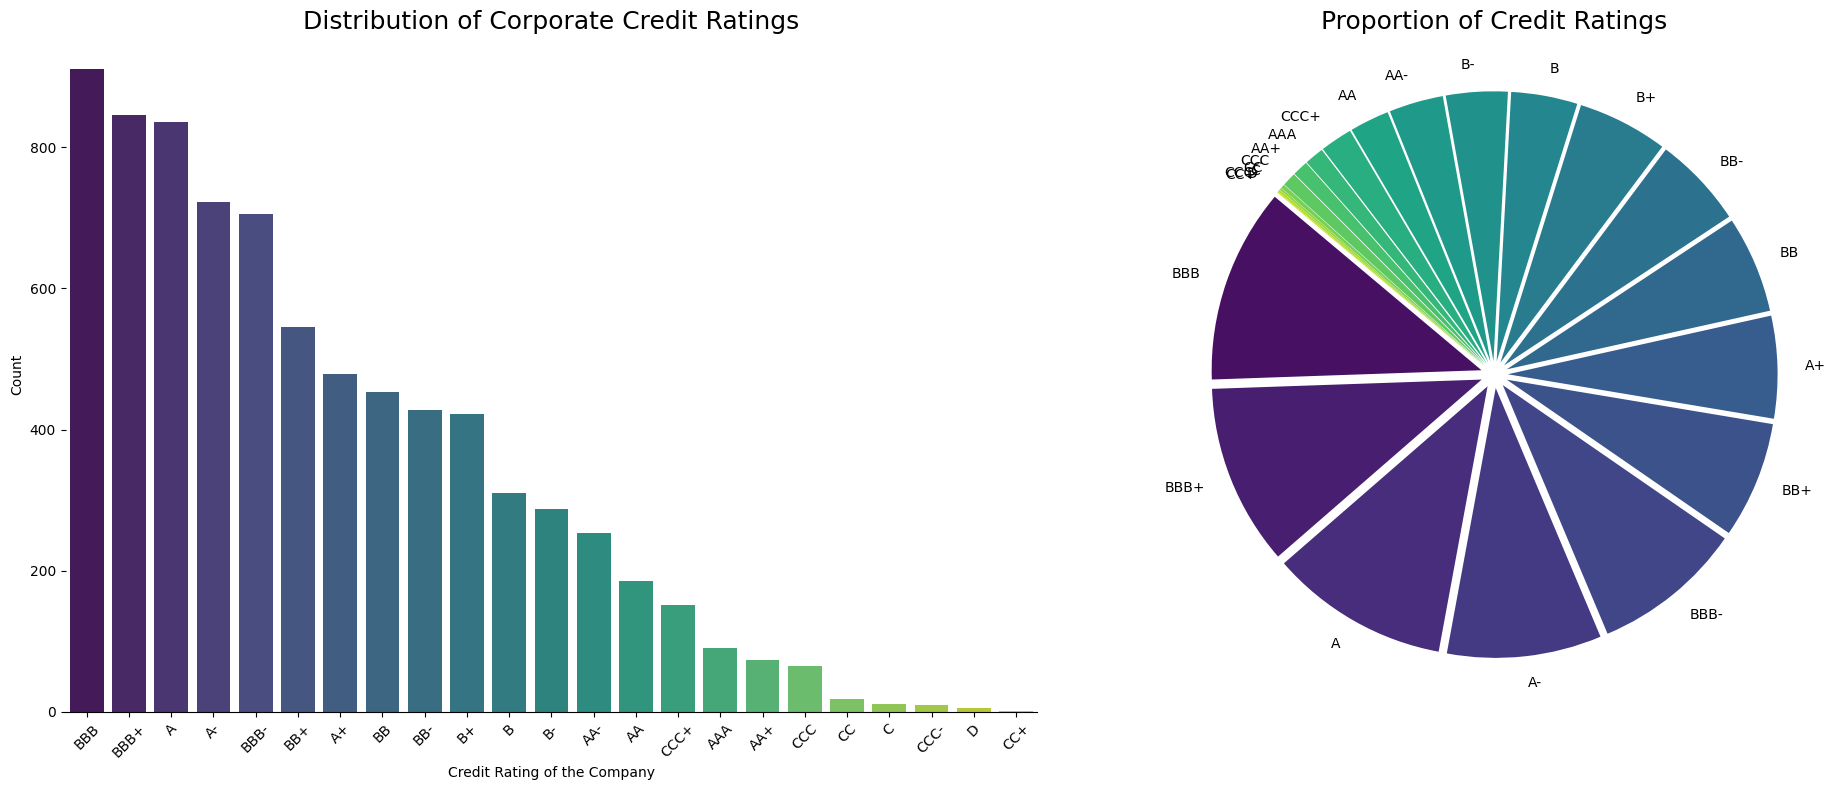

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, ax=axes[0], palette='viridis')
axes[0].set_title("Distribution of Corporate Credit Ratings", fontsize=18)
axes[0].set_xlabel("Credit Rating of the Company")
axes[0].set_ylabel("Count")
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

axes[1].pie(df['Rating'].value_counts(), 
            labels=df['Rating'].value_counts().index, 
            startangle=140, 
            colors=sns.color_palette('viridis', n_colors=len(df['Rating'].unique())),
            explode=[.05] * len(df['Rating'].value_counts()))
axes[1].set_title("Proportion of Credit Ratings", fontsize=18)

plt.tight_layout()

#### 2.1 Class balance analysis

In [9]:
categorical_cols = df.select_dtypes('object')

for c in categorical_cols:
    print(f"Class balnce for feature: {c}")
    print(df[c].value_counts(normalize=True) * 100)
    print("\n")

Class balnce for feature: Rating Agency
Rating Agency
Egan-Jones Ratings Company            36.207559
Standard & Poor's Ratings Services    36.040999
Moody's Investors Service             20.960922
Fitch Ratings                          6.111467
DBRS                                   0.333120
Japan Credit Rating Agency,Ltd.        0.281871
HR Ratings de Mexico S.A. de C.V.      0.064061
Name: proportion, dtype: float64


Class balnce for feature: Corporation
Corporation
Mondelez International, Inc.    0.294683
Tenet Healthcare Corp.          0.294683
TransDigm Inc.                  0.294683
Duke Energy Corporation         0.281871
POSCO                           0.269058
                                  ...   
Signet Jewelers Ltd             0.012812
TAL International Group Inc.    0.012812
Tecnoglass Inc.                 0.012812
Tesla, Inc.                     0.012812
The Chefs' Warehouse            0.012812
Name: proportion, Length: 1377, dtype: float64


Class balnce for feature:

C:\Users\diego\AppData\Local\Temp\ipykernel_15124\3133135033.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes('object')


### 3. Feature Distribution
numerical -> skewness, kurtosis and outliers
categorical -> cardinality (histograms, box plots)

Features with highest skewness (assymetry):
 Long-term Debt / Capital         21.595244
Operating Cash Flow Per Share    13.536540
Return On Tangible Equity         8.950553
Name: Skewness, dtype: float64

Features with highest kurtosis: Long-term Debt / Capital    2752.578679
ROE - Return On Equity      1047.433710
Debt/Equity Ratio            973.782521
Name: Kurtosis, dtype: float64


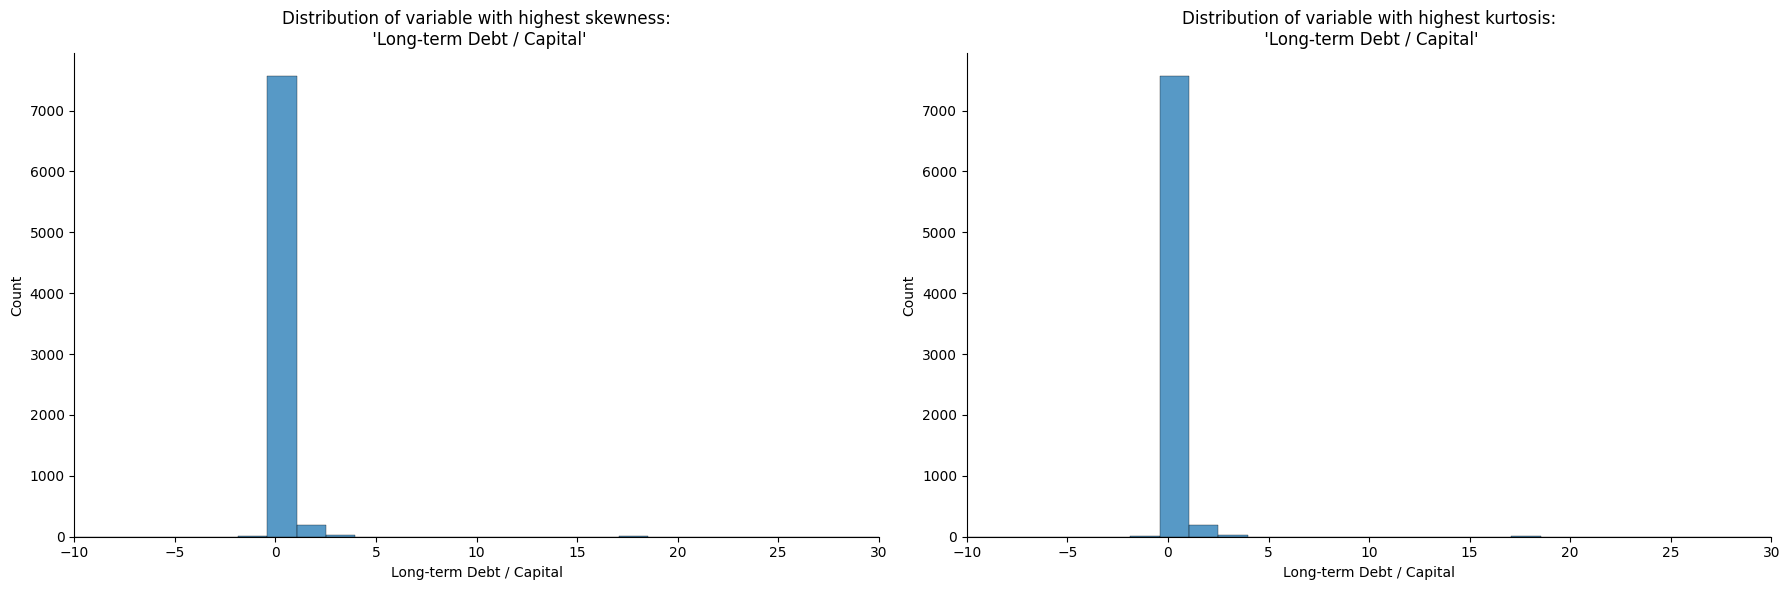

In [10]:
numeric_cols = df.select_dtypes('number').columns

metrics_df = pd.DataFrame({
    'Skewness': df[numeric_cols].skew(),
    'Kurtosis': df[numeric_cols].kurt()
})

skew_df = metrics_df['Skewness'].copy().sort_values(ascending=False)
kurt_df = metrics_df['Kurtosis'].copy().sort_values(ascending=False)

print(f"Features with highest skewness (assymetry):\n {skew_df[:3]}")
print(f"\nFeatures with highest kurtosis: {kurt_df[:3]}")

fig, axes = plt.subplots(1, 2, figsize=(18,6))

top_skew = skew_df.index[0]
sns.histplot(df[top_skew], ax=axes[0])
axes[0].set_xlim([-10, 30])
axes[0].set_title(f"Distribution of variable with highest skewness:\n '{top_skew}'")
axes[0].set_ylabel("Count")
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

top_kurt = kurt_df.index[0]
sns.histplot(df[top_kurt], ax=axes[1])
axes[1].set_xlim([-10, 30])
axes[1].set_title(f"Distribution of variable with highest kurtosis:\n '{top_skew}'")
axes[1].set_ylabel("Count")
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

There is a clear winner on both metrics in this case.

### 4. 'Rating' Feature's Relation with the Ratios

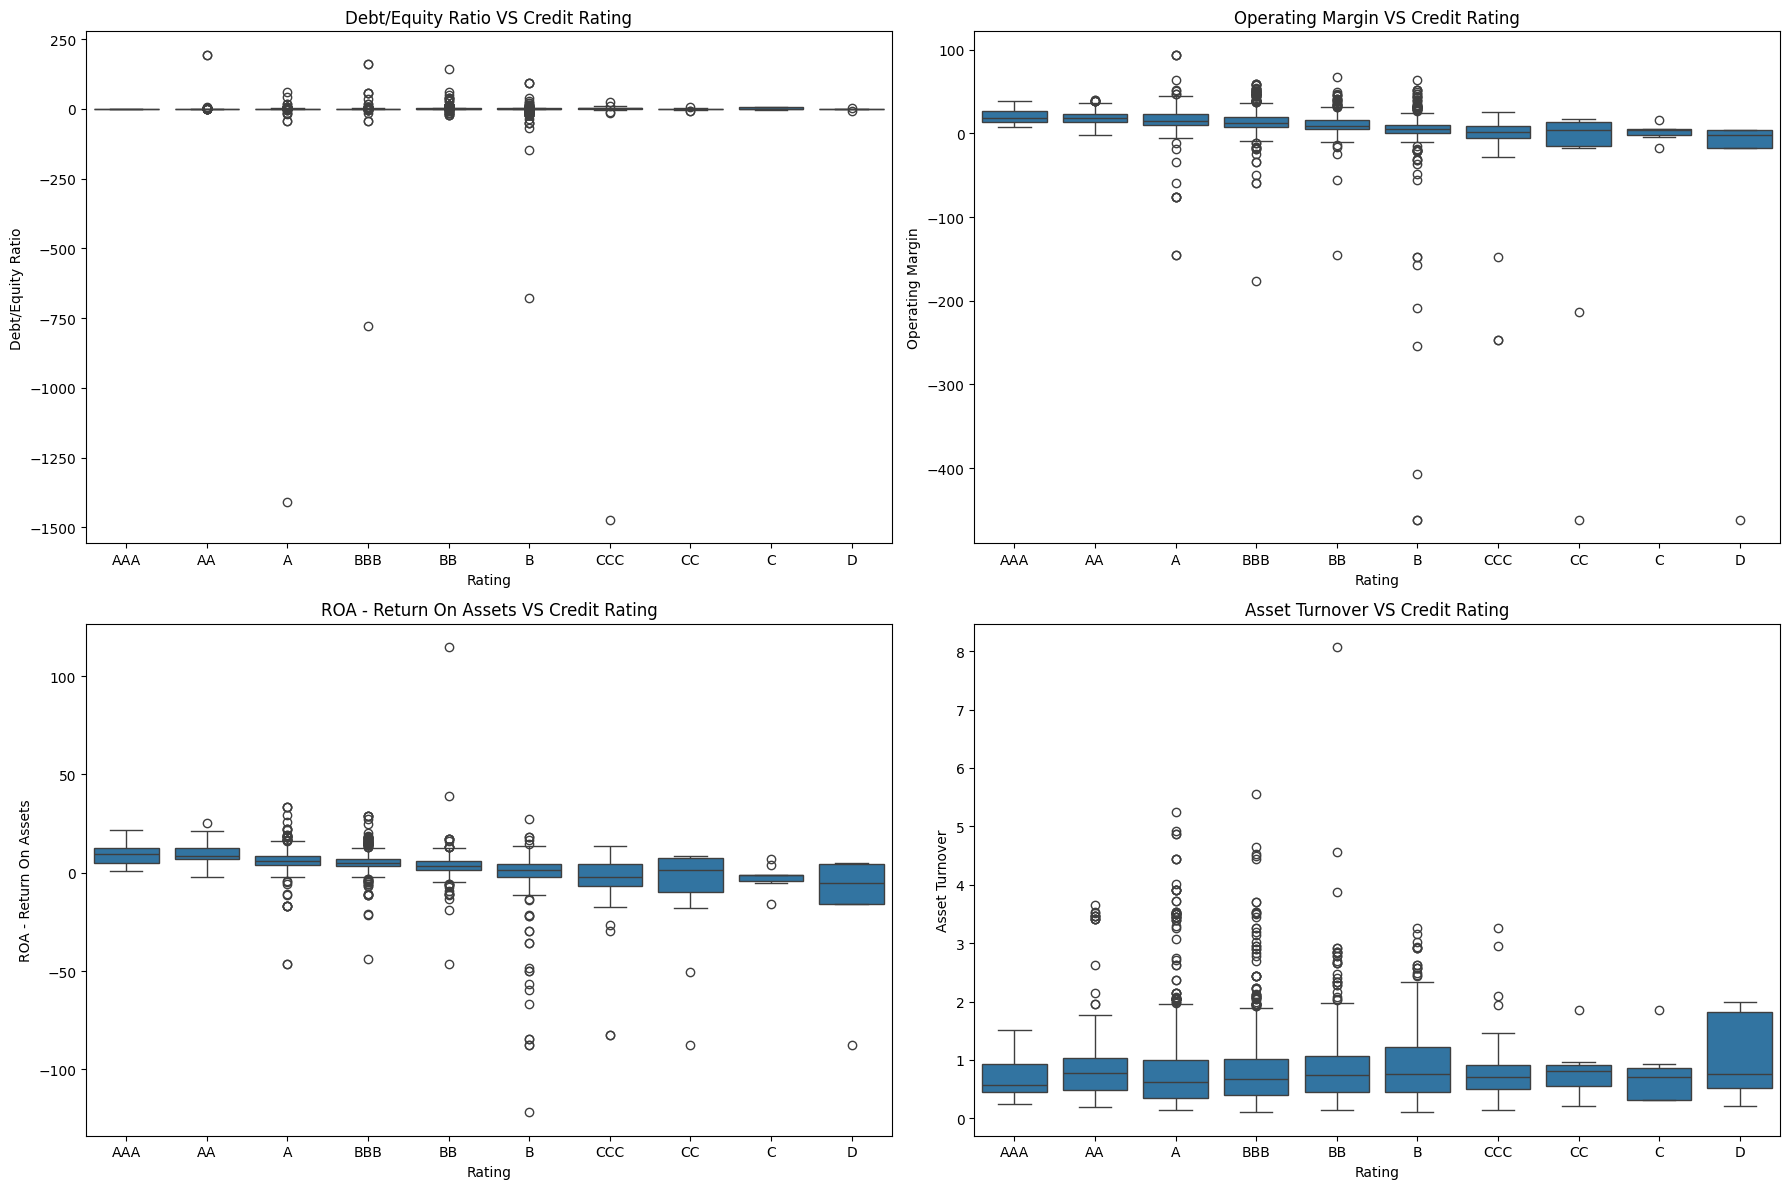

In [11]:
rating_relevance = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C', 'D']
key_ratios = ['Debt/Equity Ratio', 'Operating Margin', 'ROA - Return On Assets', 'Asset Turnover']

fig, axes = plt.subplots(2,2, figsize=(18,12))
axes = axes.flatten()

for rating, ratio in enumerate(key_ratios):
    sns.boxplot(df, x='Rating', y=ratio, order=rating_relevance, ax=axes[rating])
    axes[rating].set_title(f"{ratio} VS Credit Rating")

plt.tight_layout()
plt.show()

### 5. Feature Correlation

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0.5, 0, 'CIK'),
  Text(1.5, 0, 'Binary Rating'),
  Text(2.5, 0, 'SIC Code'),
  Text(3.5, 0, 'Current Ratio'),
  Text(4.5, 0, 'Long-term Debt / Capital'),
  Text(5.5, 0, 'Debt/Equity Ratio'),
  Text(6.5, 0, 'Gross Margin'),
  Text(7.5, 0, 'Operating Margin'),
  Text(8.5, 0, 'EBIT Margin'),
  Text(9.5, 0, 'EBITDA Margin'),
  Text(10.5, 0, 'Pre-Tax Profit Margin'),
  Text(11.5, 0, 'Net Profit Margin'),
  Text(12.5, 0, 'Asset Turnover'),
  Text(13.5, 0, 'ROE - Return On Equity'),
  Text(14.5, 0, 'Return On Tangible Equity'),
  Text(15.5, 0, 'ROA - Return On Assets'),
  Text(16.5, 0, 'ROI - Return On Investment'),
  Text(17.5, 0, 'Operating Cash Flow Per Share'),
  Text(18.5, 0, 'Free Cash Flow Per Share')])

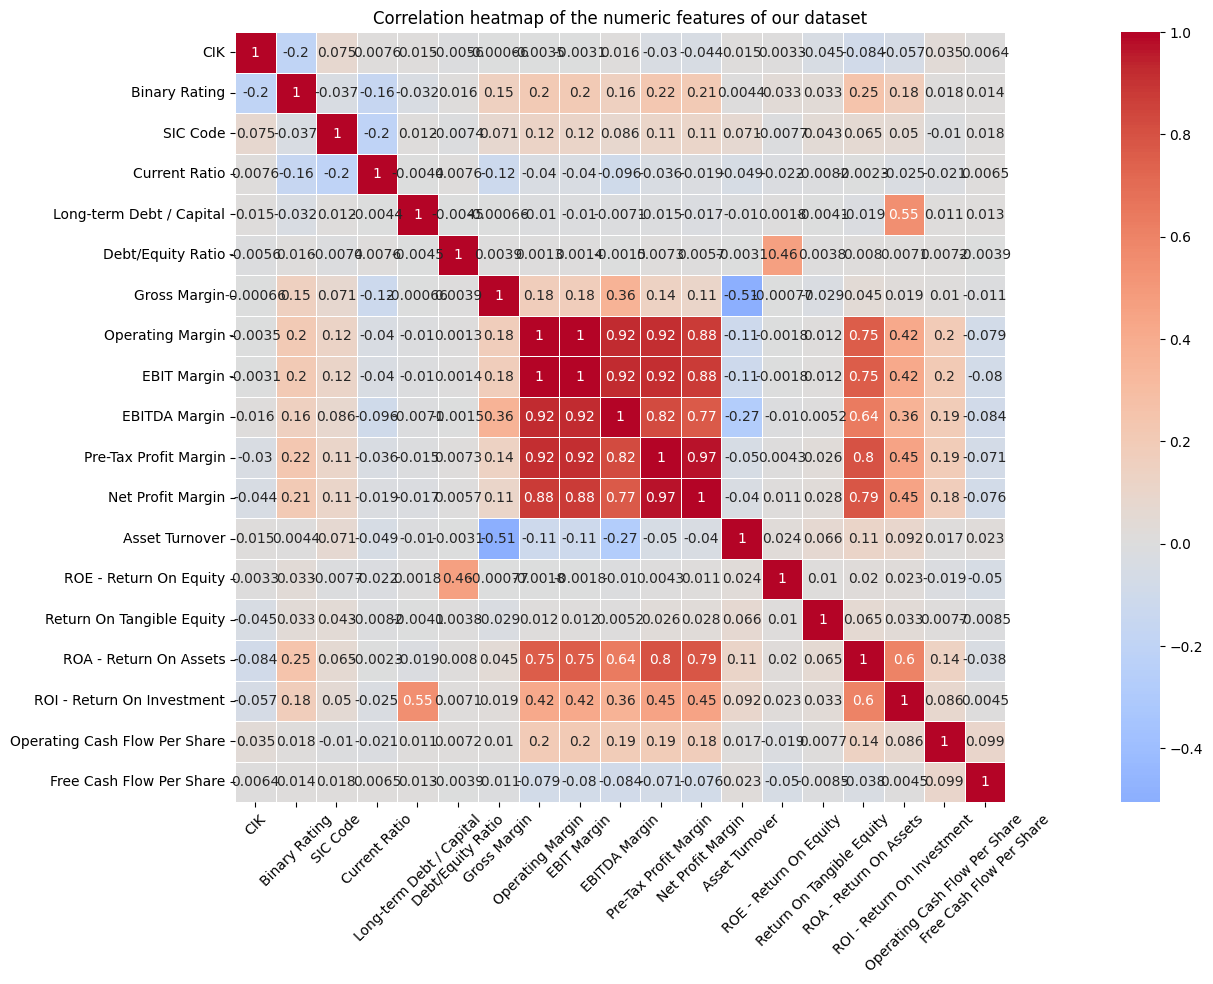

In [12]:
corr_matrix = df.select_dtypes('number').corr()

plt.figure(figsize=(30, 10))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=.5,
)
plt.title("Correlation heatmap of the numeric features of our dataset",)
plt.xticks(rotation=45)